In [79]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/mnt/act3/users/yilun/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes', 'chisquare']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Data histogram

In [80]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit

from sklearn.ensemble import AdaBoostRegressor
from utils import load_data, loss_func

###################
# user parameters #
###################

# input parameters
cat_filename = 'data/Catalog_Graham+2018_10YearPhot.dat'
features_name = ['u10', 'g10', 'r10', 'i10', 'z10', 'y10']
labels_name = 'redshift'

cat_data = load_data(cat_filename)

In [81]:
cat_data.head()

,id,redshift,tu,tg,tr,ti,tz,ty,u10,uerr10,...,ierr10,z10,zerr10,y10,yerr10,g-u,r-g,i-r,z-i,y-z
0,1.0,0.4347,24.1672,23.8903,22.9657,22.7872,22.6804,22.6519,24.1964,0.0428,...,0.0089,22.6679,0.0109,22.6677,0.0286,-0.3044,-0.9240,-0.1681,-0.1320,-0.0002
1,9.0,0.4303,26.3560,26.1025,25.2026,25.0915,25.0376,25.0283,26.4838,0.2462,...,0.0452,25.0253,0.0820,25.2150,0.2289,-0.3008,-0.9337,-0.1647,-0.0593,0.1897
2,10.0,0.6223,26.4544,25.2411,23.8998,23.1014,22.7657,22.6371,26.2380,0.2663,...,0.0105,22.7731,0.0116,22.6585,0.0282,-1.0455,-1.2964,-0.7872,-0.3358,-0.1146
3,12.0,1.2941,24.4069,24.4892,24.5397,24.4657,23.9585,23.7021,24.4269,0.0513,...,0.0270,23.9574,0.0314,23.6417,0.0728,0.0510,0.0684,-0.1029,-0.4860,-0.3157
4,15.0,1.3160,23.5656,23.6985,23.6166,23.4047,22.8325,22.5052,23.5697,0.0278,...,0.0125,22.8263,0.0122,22.5028,0.0252,0.1293,-0.0899,-0.2040,-0.5788,-0.3235


Text(0.5,0,'redshifts')

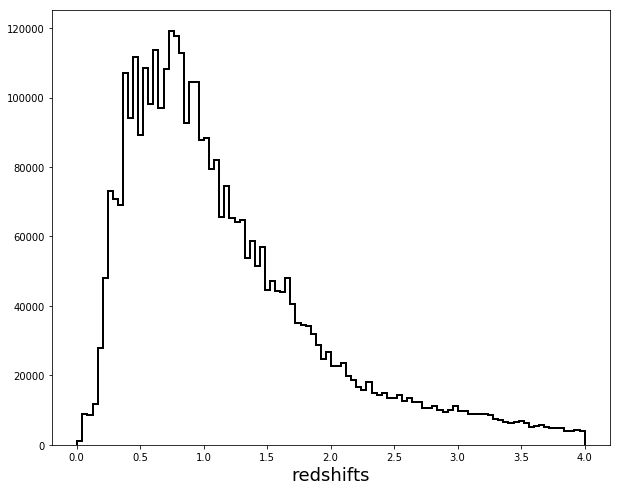

In [82]:
plt.figure(figsize=(10,8))
plt.hist(cat_data.redshift, bins=100, histtype='step', lw=2, color="k");
plt.xlabel("redshifts", fontsize=18)

/mnt/act3/users/yilun/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/mnt/act3/users/yilun/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


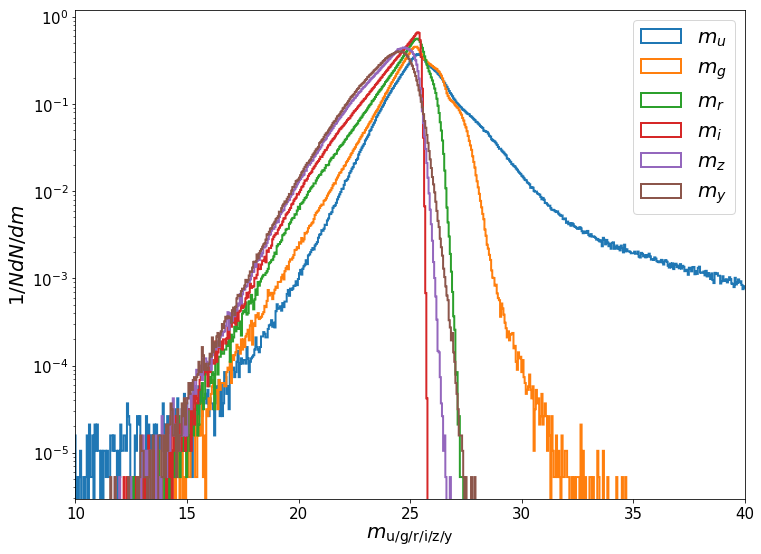

In [83]:
fig, ax = plt.subplots(1,1,figsize=(12,9))
bins = np.linspace(0,50,1000)
cat_data.hist('u10', bins=bins, histtype='step', ax=ax, label=r"$m_u$",lw=2,normed = True)
cat_data.hist('g10', bins=bins, histtype='step', ax=ax, label=r"$m_g$",lw=2,normed = True)
cat_data.hist('r10', bins=bins, histtype='step', ax=ax, label=r"$m_r$",lw=2,normed = True)
cat_data.hist('i10', bins=bins, histtype='step', ax=ax, label=r"$m_i$",lw=2,normed = True)
cat_data.hist('z10', bins=bins, histtype='step', ax=ax, label=r"$m_z$",lw=2,normed = True)
cat_data.hist('y10', bins=bins, histtype='step', ax=ax, label=r"$m_y$",lw=2,normed = True)
ax.legend(loc="best", fontsize=20)
ax.tick_params(labelsize=15)
ax.set_yscale('log')
ax.set_xlim(10,40)
ax.set_xlabel(r'$m_{\rm u/g/r/i/z/y}$', fontsize=20)
ax.set_ylabel(r'$1/N dN/dm$', fontsize=20)
ax.set_title("")
ax.grid('off')


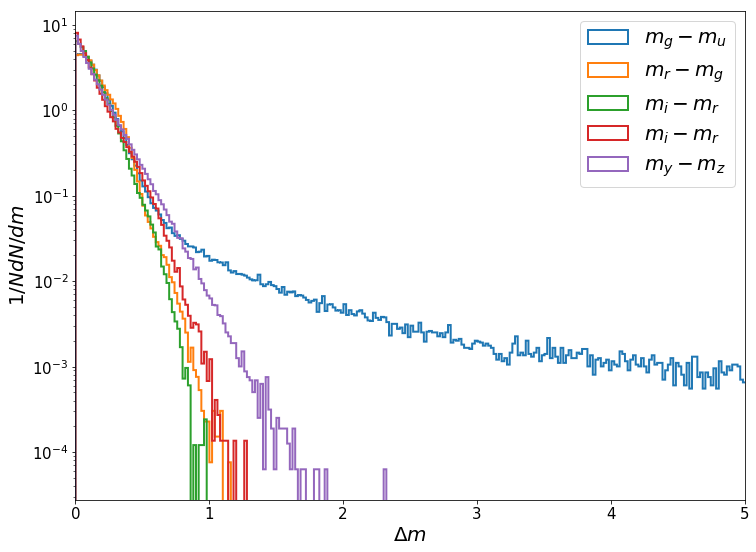

In [84]:
fig, ax = plt.subplots(1,1,figsize=(12,9))
bins = np.linspace(0,20,1000)
#cat_data.u10.hist(bins=bins, histtype='step', ax=ax, label=r"$m_u$",lw=2,normed= True)
(cat_data.g10-cat_data.u10).hist(bins=bins, histtype='step', ax=ax, label=r"$m_g-m_u$",lw=2,normed=True)
(cat_data.r10-cat_data.g10).hist(bins=bins, histtype='step', ax=ax, label=r"$m_r-m_g$",lw=2,normed=True)
(cat_data.i10-cat_data.r10).hist(bins=bins, histtype='step', ax=ax, label=r"$m_i-m_r$",lw=2,normed=True)
(cat_data.z10-cat_data.i10).hist(bins=bins, histtype='step', ax=ax, label=r"$m_i-m_r$",lw=2,normed=True)
(cat_data.y10-cat_data.z10).hist(bins=bins, histtype='step', ax=ax, label=r"$m_y-m_z$",lw=2,normed=True)
ax.legend(loc="best", fontsize=20)
ax.tick_params(labelsize=15)
ax.set_yscale('log')
#ax.set_xscale('log')

ax.set_xlim(0,5)
ax.set_xlabel(r'$\Delta m$', fontsize=20)
ax.set_ylabel(r'$1/N dN/dm$', fontsize=20)
ax.set_title("")
ax.grid('off')

# corner plot

In [85]:
import corner
import seaborn as sns

In [86]:
#ugrizy
cat_data['g-u'] = cat_data['g10'] - cat_data['u10']
cat_data['r-g'] = cat_data['r10'] - cat_data['g10']
cat_data['i-r'] = cat_data['i10'] - cat_data['r10']
cat_data['z-i'] = cat_data['z10'] - cat_data['i10']
cat_data['y-z'] = cat_data['y10'] - cat_data['z10']

In [87]:
df = cat_data.sample(10000)

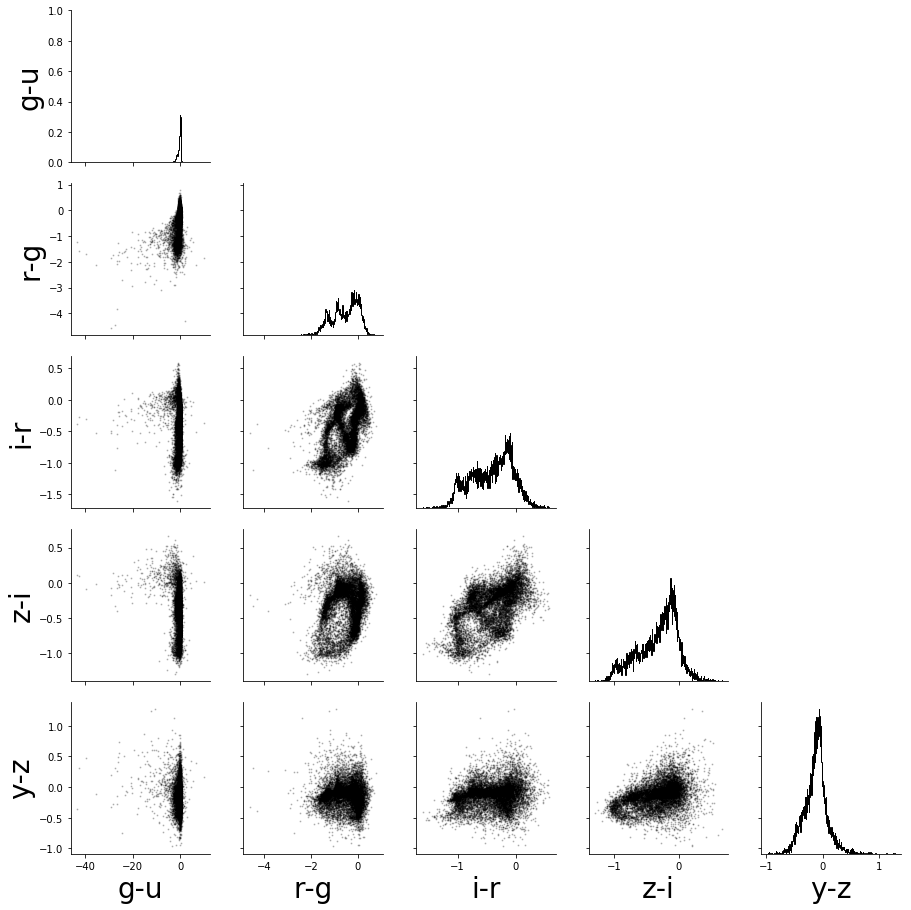

In [88]:
grid = sns.PairGrid(df, vars=['g-u','r-g','i-r','z-i','y-z'])
# grid.map_lower(sns.kdeplot)
grid.map_lower(plt.scatter, s=1, alpha=0.2, color='k')
grid.map_diag(plt.hist, bins=500, fill=False, histtype='step', color='k', lw=1, normed=True)

for i in range(grid.axes.shape[0]):
    for j in range(grid.axes.shape[1]):
        grid.axes[i,j].yaxis.label.set_size(28)
        grid.axes[i,j].xaxis.label.set_size(28)

for i, j in zip(*np.triu_indices_from(grid.axes, 1)):
    grid.axes[i, j].set_visible(False)


# photo_z vs spec_z

In [89]:
from utils import load_data, loss_func

In [107]:
input_dir = "./outputs/"                                                                                                                                                                                                                     
output_dir = "./outputs/knn"                                                                                                                                                                                                                 
prefix = "randfor_diff"
index_to_plot=10

# load data
if not os.path.exists(input_dir):
    print("Error: input path doesn't exist!")

# get list of sample sizes and their corresponding scores
filename = os.path.join(input_dir, "%s.npy" % prefix)
if not os.path.exists(filename):
    print("Error: %s doesn't exists, exiting..." % filename)
data = np.load(filename)
sample_sizes = data[0,:]
mads = data[1,:]

# get the prediction results (photo-z)
filename = os.path.join(input_dir, "%s_pred.npy" % prefix)
if not os.path.exists(filename):
    print("Error: %s doesn't exists, exiting..." % filename)
y_preds = np.load(filename)

# get the true redshift (spec-z)
filename = os.path.join(input_dir, "%s_truth.npy" % prefix)
if not os.path.exists(filename):
    print("Error: %s doesn't exists, exiting..." % filename)
y_truths = np.load(filename)

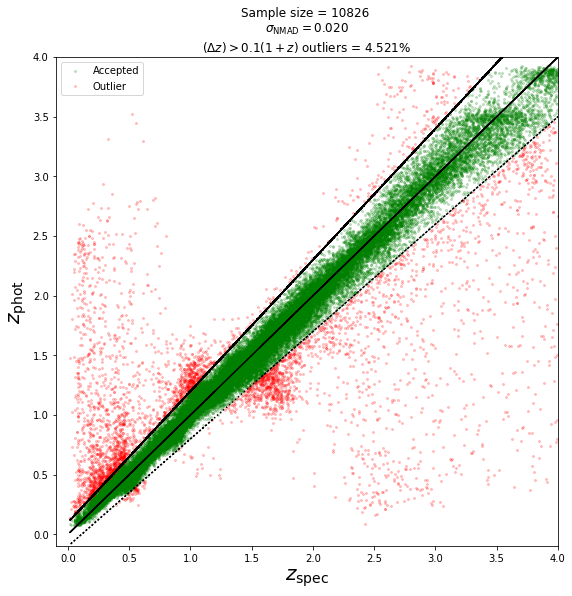

In [108]:
plt.figure(figsize=(9,9))                                                                                                                                                                                                              
xdata = y_truths[index_to_plot, :]                                                                                                                                                                                                       
ydata = y_preds[index_to_plot, :]                                                                                                                                                                                                        

bad = np.ravel(np.where(np.abs(ydata-xdata)/(1+xdata)>=0.1))                                                                                                                                                                             
good = np.ravel(np.where(np.abs(ydata-xdata)/(1+xdata)<0.1))                                                                                                                                                                             

nmad = loss_func(ydata, xdata)                                                                                                                                                                                                           
outlier_ratio = len(bad)*100.0/len(xdata)                                                                                                                                                                                                

plt.plot(xdata[good], ydata[good], 'go', label="Accepted",                                                                                                                                                                               
         alpha=0.2, markersize=2)                                                                                                                                                                                                        
plt.plot(xdata[bad], ydata[bad], 'ro', label="Outlier",                                                                                                                                                                                  
         alpha=0.2, markersize=2)                                                                                                                                                                                                        

plt.plot(xdata, xdata, 'k-')                                                                                                                                                                                                             
plt.plot(xdata, xdata+0.1*(1+xdata), 'k:', xdata, xdata-0.1*(1+xdata), 'k:')                                                                                                                                                                                              

plt.title("Sample size = %d \n" % sample_sizes[index_to_plot] +                                                                                                                                                                          
          r"$\sigma_{\rm NMAD} = %.3f$" % nmad + "\n" +                                                                                                                                                                              
          r"$(\Delta z) > 0.1(1+z)$ outliers = %.3f%%" % outlier_ratio)                                                                                                                                                                  

plt.xlim(-0.1, 4,1)                                                                                                                                                                                                                      
plt.ylim(-0.1, 4,1)                                                                                                                                                                                                                      
plt.xlabel(r"$z_{\rm spec}$", fontsize=20)                                                                                                                                                                                               
plt.ylabel(r"$z_{\rm phot}$", fontsize=20)                                                                                                                                                                                               
plt.legend(loc="best")                                                                                                                                                                                                                   
plt.show()
#output_filename = os.path.join(output_dir, "%s_corr_%d.png" %                                                                                                                                                                            
#                               (prefix, index_to_plot))                                                                                                                                                                                  
#print("Saving plot: %s" % output_filename)                                                                                                                                                                                               
# plt.savefig(output_filename)                                                                                                                                                                                                             
#plt.clf()       

# power law for NMAD and outlier fractions

In [145]:
from utils import loss_func

input_dir = "./outputs/"                                                                                                                                                                                                                     
prefix = "xgboost_diff"

# load data
if not os.path.exists(input_dir):
    print("Error: input path doesn't exist!")
                                                                                                                                                                                                                                             
# get list of sample sizes and their corresponding scores                                                                                                                                                                                    
filename = os.path.join(input_dir, "%s.npy" % prefix)
if not os.path.exists(filename):
    print("Error: %s doesn't exists, exiting..." % filename)
data = np.load(filename)
sample_sizes = data[0,:]
mads = data[1,:]
                                                                                                                                                                                                                                             
# get the prediction results (photo-z)                                                                                                                                                                                                       
filename = os.path.join(input_dir, "%s_pred.npy" % prefix)                                                                                                                                                                                   
if not os.path.exists(filename):                                                                                                                                                                                                             
    print("Error: %s doesn't exists, exiting..." % filename)
y_preds = np.load(filename)

# get the true redshift (spec-z)
filename = os.path.join(input_dir, "%s_truth.npy" % prefix)
if not os.path.exists(filename):
    print("Error: %s doesn't exists, exiting..." % filename)
y_truths = np.load(filename)        

In [146]:
sample_sizes = sample_sizes[:y_preds.shape[0]]
mads = mads[:y_preds.shape[0]]

In [147]:
mads_outlier = []
mads_accepted = []
outlier_fraction = []
for i in range(y_truths.shape[0]):
    xdata = y_truths[i, :]
    ydata = y_preds[i, :]
    bad = np.ravel(np.where(np.abs(ydata-xdata)/(1+xdata)>=0.1))
    good = np.ravel(np.where(np.abs(ydata-xdata)/(1+xdata)<0.1))
    frac = len(bad)*1.0/len(xdata)
    mads_outlier.append(loss_func(ydata[bad], xdata[bad]))
    mads_accepted.append(loss_func(ydata[good], xdata[good]))
    outlier_fraction.append(frac)

In [148]:
from scipy.optimize import curve_fit
from utils import target_func
from scipy.stats import chisquare

def add_curve_fit(ax, x, y):
    popt, pcov = curve_fit(target_func, x, y, bounds=([-50,-50,-1],[50,50,0]))
    c, A, n = popt
    label = r"$%.4f + %.4f N^{%.1f}$" % (c, A, n)
    ax.plot(x, target_func(x, *popt), 'k-', label=label)
    y_exp = target_func(x, *popt)
    print("chi-square:", chisquare(y_exp, y, ddof=3))


('chi-square:', Power_divergenceResult(statistic=0.0005540554416534595, pvalue=1.0))
('chi-square:', Power_divergenceResult(statistic=0.005642818944412917, pvalue=1.0))


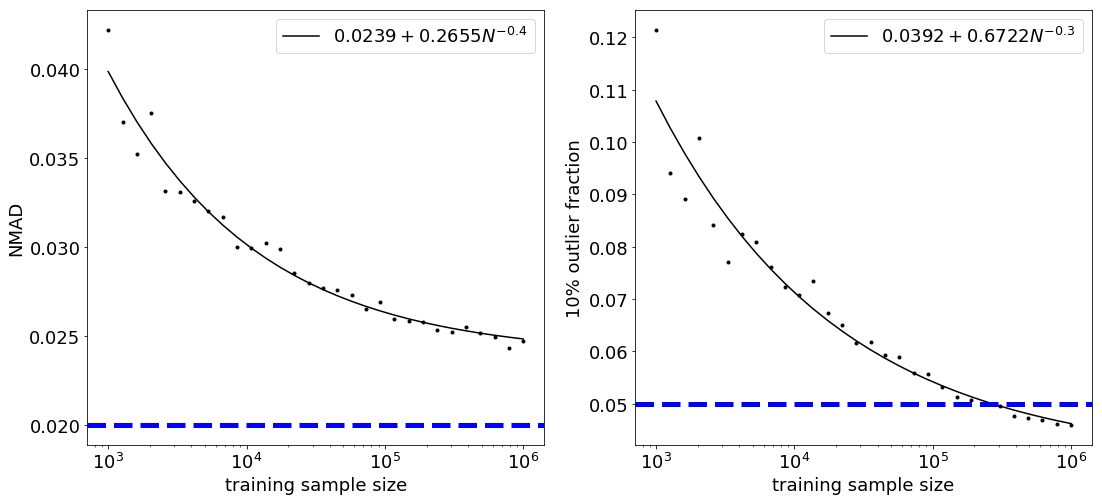

In [149]:
fig, axes = plt.subplots(1,2,figsize=(18,8))
axes[0].plot(sample_sizes, mads, 'k.', label="")
axes[0].set_ylabel("NMAD", fontsize=18)
# axes[0].axhline(0.05, linestyle="--", lw=5, color="g")
axes[0].axhline(0.02, linestyle="--", lw=5, color="b")
add_curve_fit(axes[0], sample_sizes, mads)

axes[1].plot(sample_sizes, outlier_fraction, 'k.')
axes[1].set_ylabel("10% outlier fraction", fontsize=18)
add_curve_fit(axes[1], sample_sizes, outlier_fraction)
axes[1].axhline(0.05, linestyle="--", lw=5, color="b")

for ax in axes:
    ax.tick_params(labelsize=18)
    ax.set_xscale('log')
    ax.set_xlabel("training sample size", fontsize=18)
    ax.legend(loc="best", fontsize=18)

# power law per redshift bins

In [150]:
z_edges = np.linspace(0,4,9)
z_bins = np.stack([z_edges[:-1], z_edges[1:]], axis=1)
print("Redshift bins: %s" % z_bins)

Redshift bins: [[0.  0.5]
 [0.5 1. ]
 [1.  1.5]
 [1.5 2. ]
 [2.  2.5]
 [2.5 3. ]
 [3.  3.5]
 [3.5 4. ]]


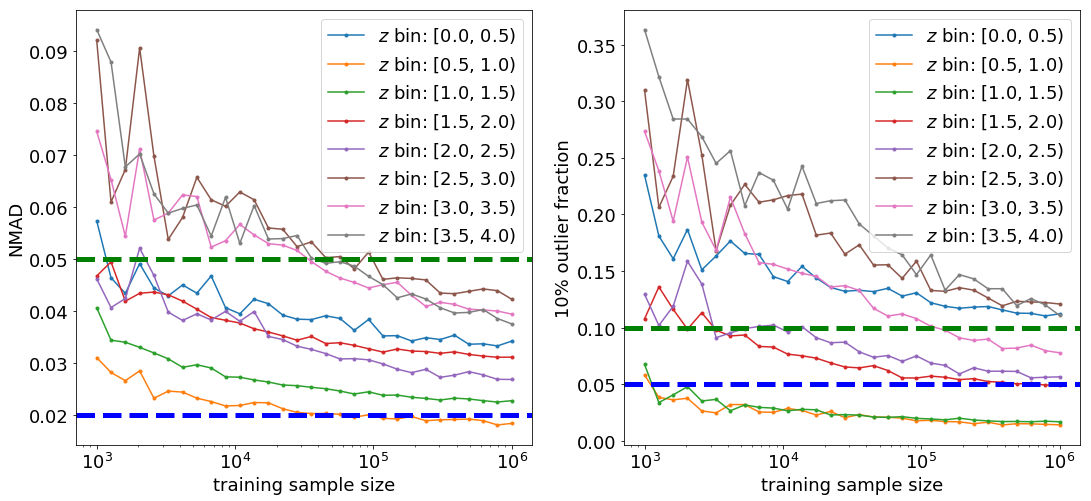

In [151]:
fig, axes = plt.subplots(1,2,figsize=(18,8))

for i in range(len(z_bins)):
    mads = []
    outlier_fraction = []
    for j in range(len(sample_sizes)):
        xdata = y_truths[j, :]
        ydata = y_preds[j, :]
        mask = np.logical_and(xdata >= z_bins[i][0], xdata < z_bins[i][1])
        xdata = xdata[mask]
        ydata = ydata[mask]
        bad = np.ravel(np.where(np.abs(ydata-xdata)/(1+xdata)>=0.1))
        frac = len(bad)*1.0/len(xdata)
        mads.append(loss_func(ydata, xdata))
        outlier_fraction.append(frac)
    
    # plotting
    axes[0].plot(sample_sizes, mads, ".-", label=r"$z$ bin: [%.1f, %.1f)" % (z_bins[i][0], z_bins[i][1]))
    axes[0].set_ylabel("NMAD", fontsize=18)

    axes[1].plot(sample_sizes, outlier_fraction, ".-", label=r"$z$ bin: [%.1f, %.1f)" % (z_bins[i][0], z_bins[i][1]))
    axes[1].set_ylabel("10% outlier fraction", fontsize=18)

axes[0].axhline(0.05, linestyle="--", lw=5, color="g")
axes[0].axhline(0.02, linestyle="--", lw=5, color="b")
axes[1].axhline(0.1, linestyle="--", lw=5, color="g")
axes[1].axhline(0.05, linestyle="--", lw=5, color="b")


for ax in axes:
    ax.tick_params(labelsize=18)
    ax.set_xscale('log')
    ax.set_xlabel("training sample size", fontsize=18)
    ax.legend(loc="best", fontsize=18)
    

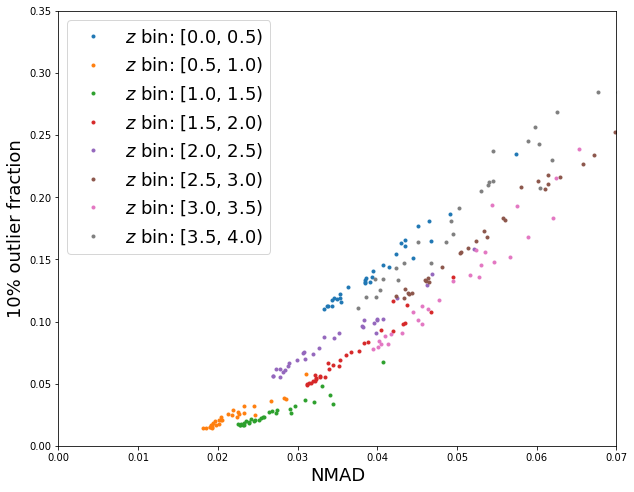

In [152]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

for i in range(len(z_bins)):
    mads = []
    outlier_fraction = []
    for j in range(len(sample_sizes)):
        xdata = y_truths[j, :]
        ydata = y_preds[j, :]
        mask = np.logical_and(xdata >= z_bins[i][0], xdata < z_bins[i][1])
        xdata = xdata[mask]
        ydata = ydata[mask]
        bad = np.ravel(np.where(np.abs(ydata-xdata)/(1+xdata)>=0.1))
        frac = len(bad)*1.0/len(xdata)
        mads.append(loss_func(ydata, xdata))
        outlier_fraction.append(frac)
    
    # plotting
    ax.plot(mads, outlier_fraction, ".", label=r"$z$ bin: [%.1f, %.1f)" % 
            (z_bins[i][0], z_bins[i][1]), markersize=6)
    ax.set_ylabel("10% outlier fraction", fontsize=18)
    ax.set_xlabel("NMAD", fontsize=18)
    ax.set_ylim(0,0.35)
    ax.set_xlim(0,0.07)
    ax.legend(loc="best", fontsize=18)

# redshift histograms

Text(0.5,0,'$z_{\\rm spec}$')

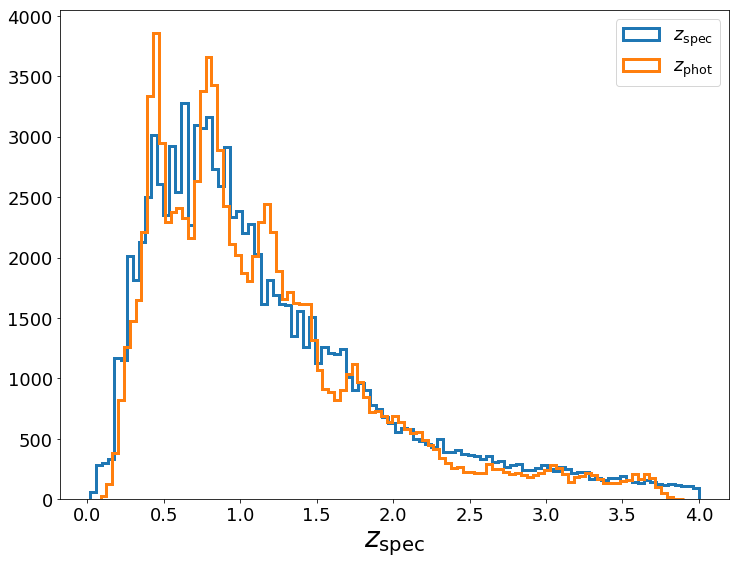

In [56]:
i = 11
plt.figure(figsize=(12,9))
plt.hist(y_truths[i], bins=100, histtype='step',lw=3,label=r'$z_{\rm spec}$');
plt.hist(y_preds[i], bins=100, histtype='step',lw=3,label=r'$z_{\rm phot}$');
plt.legend(loc="best", fontsize=18)
plt.tick_params(labelsize=18)
plt.xlabel(r"$z_{\rm spec}$", fontsize=28)

# photo-z vs specs-z + redshift

In [ ]:
knn_tuned